In [1]:
#dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
import requests
warnings.filterwarnings('ignore')

# World Happiness Report Analysis

In [2]:
#create a dataframe from a file using pandas
file = 'Resources/WorldHappinessReport.csv'
# The correct encoding must be used to read the CSV in pandas
RawData = pd.read_csv(file)
WHR_DF=RawData.loc[RawData["year"]==2017,:]
WHR_DF.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

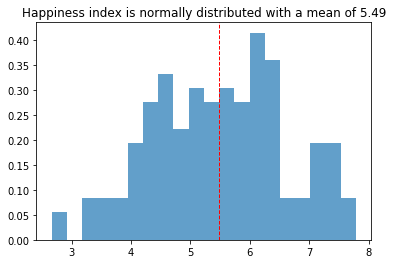

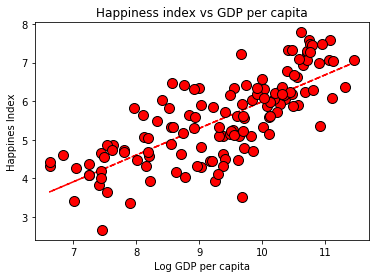

r= 0.7522869647480472 P=value= 1.0979062835798883e-25


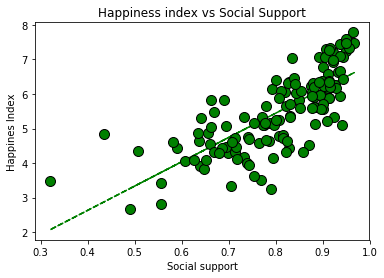

r= 0.7571754011787514  P=value= 2.6740887123583965e-27


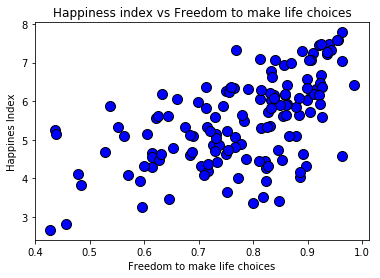

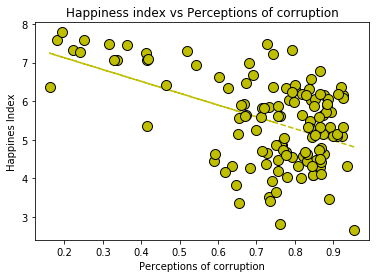

r= -0.4884795058249085  P=value= 4.287013557750856e-09


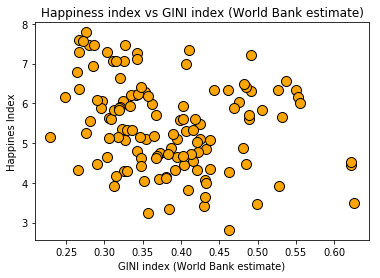

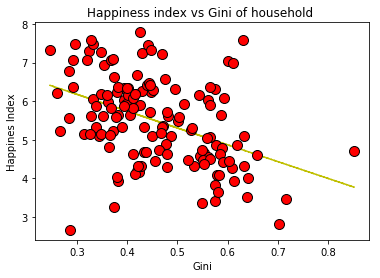

r= -0.42662868105209967  P=value= 1.3262255452069972e-07


In [3]:
#Histogram of happines index

mean=WHR_DF['Life Ladder'].mean()
mean=str(round(mean, 2))

plt.hist(WHR_DF['Life Ladder'], 20, density=True, alpha=0.7, label="Happiness Index")
plt.axvline(WHR_DF['Life Ladder'].mean(), color='r', linestyle='dashed', linewidth=1)

plt.title("Happiness index is normally distributed with a mean of " + str(mean) )


#save the image in the folder
plt.savefig("Graphs/HappinessHistogram.png")
plt.show()

                                    #GDP
    
#eliminate nulls
gdp=WHR_DF[['Life Ladder','Log GDP per capita']]
gdp["null"]=pd.isna(gdp['Log GDP per capita'])
gdp=gdp.loc[gdp["null"]==False]

#regression
(slope, intercept, r, p, error) = linregress(gdp["Log GDP per capita"], gdp['Life Ladder'])
fit = slope * gdp["Log GDP per capita"] + intercept
#plot
fig,    ax = plt.subplots() 
ax.errorbar(gdp["Log GDP per capita"], gdp['Life Ladder'],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
ax.plot(gdp["Log GDP per capita"], fit, 'r--') 
plt.xlabel('Log GDP per capita')
plt.ylabel('Happines Index')
plt.title("Happiness index vs GDP per capita")



#save the image in the folder
plt.savefig("Graphs/HappinessVsGDP.png")
plt.show()

print ("r= "+ str(r) + " P=value= "+str(p) )


                                    #social suport

#eliminate nulls
ss=WHR_DF[['Life Ladder','Social support']]
ss["null"]=pd.isna(ss['Social support'])
ss=ss.loc[ss["null"]==False]

#regression
(slope, intercept, r, p, error) = linregress(ss["Social support"], ss['Life Ladder'])
fit = slope * ss["Social support"] + intercept

fig,    ax = plt.subplots() 
ax.errorbar(ss["Social support"], ss['Life Ladder'],  fmt="o",color= 'g'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
ax.plot(ss["Social support"], fit, 'g--') 

plt.xlabel('Social support')
plt.ylabel('Happines Index')
plt.title("Happiness index vs Social Support")
#save the image in the folder
plt.savefig("Graphs/HappinessVsSocilaSupport.png")
plt.show()

print ("r= "+ str(r) + "  P=value= "+str(p) )
                                    #Freedom to make life choices
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF["Freedom to make life choices"], WHR_DF['Life Ladder'],   fmt="o",color= 'b'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happines Index')
plt.title("Happiness index vs Freedom to make life choices")
#save the image in the folder
plt.savefig("Graphs/HappinessVsLifeChoices.png")
plt.show()


#Corruption

#eliminate nulls
cc=WHR_DF[['Life Ladder','Perceptions of corruption']]
cc["null"]=pd.isna(cc['Perceptions of corruption'])
cc=cc.loc[cc["null"]==False]

#regression
(slope, intercept, r, p, error) = linregress(cc["Perceptions of corruption"], cc['Life Ladder'])
fit = slope * cc["Perceptions of corruption"] + intercept

fig,    ax = plt.subplots() 
ax.errorbar(cc["Perceptions of corruption"],cc['Life Ladder'],   fmt="o",color= 'y'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
ax.plot(cc["Perceptions of corruption"], fit, 'y--') 

plt.xlabel('Perceptions of corruption')
plt.ylabel('Happines Index')
plt.title("Happiness index vs Perceptions of corruption")
#save the image in the folder
plt.savefig("Graphs/HappinessVsCorruption.png")
plt.show()
print ("r= "+ str(r) + "  P=value= "+str(p) )

                                #GINI index (World Bank estimate)
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF["GINI index (World Bank estimate), average 2000-15"],WHR_DF['Life Ladder'],   fmt="o",color= 'orange'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('GINI index (World Bank estimate)')
plt.ylabel('Happines Index')
plt.title("Happiness index vs GINI index (World Bank estimate)")
#save the image in the folder
plt.savefig("Graphs/HappinessVsCountryPoverty.png")
plt.show()


                            #household poverty
    
#eliminate nulls
pp=WHR_DF[['Life Ladder','gini of household income reported in Gallup, by wp5-year']]
pp["null"]=pd.isna(pp['gini of household income reported in Gallup, by wp5-year'])
pp=pp.loc[pp["null"]==False]

#regression
(slope, intercept, r, p, error) = linregress(pp["gini of household income reported in Gallup, by wp5-year"], pp['Life Ladder'])
fit = slope * pp["gini of household income reported in Gallup, by wp5-year"] + intercept

fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF["gini of household income reported in Gallup, by wp5-year"], WHR_DF['Life Ladder'],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
ax.plot(pp["gini of household income reported in Gallup, by wp5-year"], fit, 'y--') 

plt.xlabel('Gini')
plt.ylabel('Happines Index')
plt.title("Happiness index vs Gini of household ")
#save the image in the folder
plt.savefig("Graphs/HappinessVsHouseholdPoverty.png")
plt.show()
print ("r= "+ str(r) + "  P=value= "+str(p) )

Rafael

In [4]:
#Getting country codes
countrycodes_file = "Resources/CountryCodesLookup.csv"
countrycodes = pd.read_csv(countrycodes_file, encoding="ISO-8859-1")
countrycodes = countrycodes.rename(columns={'COUNTRY':'country'})

#Getting happiness index
happiness_file = "Resources/WorldHappinessReport.csv"
happiness = pd.read_csv(happiness_file, encoding="ISO-8859-1")

happiness2017 = happiness.loc[happiness['year']==2017,['country','Life Ladder']]
print(happiness2017.head())

#Merging both
mymerge = pd.merge(countrycodes, happiness2017, how="left", on=['country'])
mymerge = mymerge.drop(['A3 (UN)','NUM (UN)','DIALING CODE','spotifyFlag'],axis=1)
print(mymerge.head())

        country  Life Ladder
9   Afghanistan     2.661718
19      Albania     4.639548
25      Algeria     5.248912
41    Argentina     6.039330
53      Armenia     4.287736
          country A2 (ISO)  Life Ladder
0     Afghanistan       AF     2.661718
1         Albania       AL     4.639548
2         Algeria       DZ     5.248912
3  American Samoa       AS          NaN
4         Andorra       AD          NaN


In [5]:
#Checking indicators and grabbing interesting data for analysis
baseurl = "http://api.worldbank.org/v2/country/"
year = "2017"

def grabindicator(y):
    if y == 0: #Mobile cellular subscriptions (per 100 people)
        x = "IT.CEL.SETS.P2"
    elif y == 1: #Individuals using the Internet (% of population)
        x = "IT.NET.USER.ZS"
    elif y == 2: # Population, female (% of total)
        x = "SP.POP.TOTL.FE.ZS"
    elif y == 3: # Unemployment, total (% of total labor force) (modeled ILO estimate)
        x = "SL.UEM.TOTL.ZS"
    else:
        print(f'Indicator "{y}" not available')
    return x

temp = []
mobilephones = []
internet = []
femalepopulation = []
unemployment = []

countryfound = []

def lists(indicatorcod, x, lock, errorfree):

    try:   
        if indicatorcod == 0: #Mobile cellular subscriptions (per 100 people)
            temp = x[1]
            temp = temp[0]
            mobilephones.append(temp['value'])
    
        elif indicatorcod == 1: #Individuals using the Internet (% of population)
            temp = x[1]
            temp = temp[0]
            internet.append(temp['value'])         

        elif indicatorcod == 2: # # Population, female (% of total)
            temp = x[1]
            temp = temp[0]
            femalepopulation.append(temp['value'])

        elif indicatorcod == 3: # Unemployment, total (% of total labor force) (modeled ILO estimate)
            temp = x[1]
            temp = temp[0]
            print (temp)
            print(temp['value'])
            unemployment.append(temp['value'])       
        
        else:
            print("*** Error on function 'lists' ***")

        
        if lock != 1 and errorfree == 1 and indicatorcod <1:
                countryfound.append(pais)
                lock = 1
        
    except TypeError:
        print(f'Error: Country Code "{countrycode}" not found')



for i in range (4):
    indicatorcode = grabindicator(i)
    indicatorcounter = int(i)
    lock = 0

    for code,pais in zip(mymerge['A2 (ISO)'], mymerge['country']):        
        countrycode = code
        print(f'Iteration {indicatorcounter}')
        print(pais)
        query_url = f"{baseurl}{countrycode}/indicator/{indicatorcode}?date={year}&format=json"
        print (query_url)
        response = requests.get(query_url).json()
        print(f'response is {response}\n')
        
        if len(response) < 2:
            print(f'response for {countrycode} is invalid\n')
            errorfree = 0
        elif response[1] is None:
            print(f'response for {countrycode} is None \n')
            errorfree = 0
        else:
            errorfree = 1
            lists(indicatorcounter, response, lock, errorfree)
                                  

print("\n***********all data was collected via the API")

countryfound1 = pd.DataFrame(countryfound)

#Compiling grabbed data from API Calls into one data frame

mymerge_dict = {
    "Country": countryfound,
    "Individuals using the Internet (% of population)": internet,
    "% Female Total Population": femalepopulation,
    "Total Unemployment": unemployment,
    "Mobile Phones (per 100 people)": mobilephones}

mymerge_data = pd.DataFrame(mymerge_dict)

womenmajority = []
label1 =[]


for y in mymerge_data['% Female Total Population']:
   
    if y == 50:
        womenmajority.append('turquoise')
        label1.append("Country without gender majority")
    elif y < 50:
        womenmajority.append('yellow')
        label1.append("Country with male majority")
    else:
        womenmajority.append('red')
        label1.append("Country with female majority")
 

womenmajority1 = pd.DataFrame(womenmajority)
womenmajority1 = womenmajority1.rename(columns={0:'Plot Color % Female population'})

labelGender = pd.DataFrame(label1)
labelGender = labelGender.rename(columns={0:'Female majority label'})

mymerge_data = pd.merge(mymerge_data, womenmajority1, how="outer", left_index=True,right_index=True)
mymerge_data = pd.merge(mymerge_data, labelGender, how="outer", left_index=True,right_index=True)


#Compiling grabbed data from API Calls into one data frame

mymerge_data = pd.merge(mymerge, mymerge_data, how="outer", left_on=['country'],right_on=['Country'])
mymerge_data = mymerge_data.drop(['Country'],axis=1)
mymerge_data = mymerge_data.loc[mymerge_data['Total Unemployment'] > 0,
                                ['country','A2 (ISO)','Life Ladder','Total Unemployment','Individuals using the Internet (% of population)',
                                 '% Female Total Population','Mobile Phones (per 100 people)',
                                 'Plot Color % Female population','Female majority label']]
mymerge_data = mymerge_data.loc[mymerge_data['Life Ladder'] > 0,
                                ['country','A2 (ISO)','Life Ladder','Total Unemployment','Individuals using the Internet (% of population)',
                                 '% Female Total Population','Mobile Phones (per 100 people)',
                                 'Plot Color % Female population','Female majority label']]

mymerge_data

Iteration 0
Afghanistan
http://api.worldbank.org/v2/country/AF/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'AF', 'value': 'Afghanistan'}, 'countryiso3code': 'AFG', 'date': '2017', 'value': 67.3505726035356, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Albania
http://api.worldbank.org/v2/country/AL/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'AL', 'value': 'Albania'}, 'countryiso3code': 'ALB', 'date': '2017', 'value': 119.376340144844, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Algeria
http://api.wor


Iteration 0
Belgium
http://api.worldbank.org/v2/country/BE/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'BE', 'value': 'Belgium'}, 'countryiso3code': 'BEL', 'date': '2017', 'value': 104.652527495911, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Belize
http://api.worldbank.org/v2/country/BZ/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'BZ', 'value': 'Belize'}, 'countryiso3code': 'BLZ', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Benin
http://api.worldbank.org/v2/country/B

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'KY', 'value': 'Cayman Islands'}, 'countryiso3code': 'CYM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Central African Republic
http://api.worldbank.org/v2/country/CF/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'CF', 'value': 'Central African Republic'}, 'countryiso3code': 'CAF', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Chad
http://api.worldbank.org/v2/country/TD/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pa

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'DJ', 'value': 'Djibouti'}, 'countryiso3code': 'DJI', 'date': '2017', 'value': 38.982011212297, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Dominica
http://api.worldbank.org/v2/country/DM/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'DM', 'value': 'Dominica'}, 'countryiso3code': 'DMA', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Dominican Republic
http://api.worldbank.org/v2/country/DO/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'DE', 'value': 'Germany'}, 'countryiso3code': 'DEU', 'date': '2017', 'value': 129.088475584936, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Ghana
http://api.worldbank.org/v2/country/GH/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'GH', 'value': 'Ghana'}, 'countryiso3code': 'GHA', 'date': '2017', 'value': 127.461447880875, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Gibraltar
http://api.worldbank.org/v2/country/GI/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_pa

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'ID', 'value': 'Indonesia'}, 'countryiso3code': 'IDN', 'date': '2017', 'value': 173.840223017283, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Iran, Islamic Republic of
http://api.worldbank.org/v2/country/IR/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'IR', 'value': 'Iran, Islamic Rep.'}, 'countryiso3code': 'IRN', 'date': '2017', 'value': 107.32320826633, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Iraq
http://api.worldbank.org/v2/country/IQ/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'LA', 'value': 'Lao PDR'}, 'countryiso3code': 'LAO', 'date': '2017', 'value': 54.1225780675866, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Latvia
http://api.worldbank.org/v2/country/LV/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'LV', 'value': 'Latvia'}, 'countryiso3code': 'LVA', 'date': '2017', 'value': 126.386619274031, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Lebanon
http://api.worldbank.org/v2/country/LB/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_pa

response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for MQ is invalid

Iteration 0
Mauritania
http://api.worldbank.org/v2/country/MR/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'MR', 'value': 'Mauritania'}, 'countryiso3code': 'MRT', 'date': '2017', 'value': 92.1716607272457, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Mauritius
http://api.worldbank.org/v2/country/MU/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'MU', 'value': 'Mauritius'}

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'NE', 'value': 'Niger'}, 'countryiso3code': 'NER', 'date': '2017', 'value': 40.8750838325104, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Nigeria
http://api.worldbank.org/v2/country/NG/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'NG', 'value': 'Nigeria'}, 'countryiso3code': 'NGA', 'date': '2017', 'value': 75.9196242207227, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Niue
http://api.worldbank.org/v2/country/NU/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'RU', 'value': 'Russian Federation'}, 'countryiso3code': 'RUS', 'date': '2017', 'value': 157.887534831124, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Rwanda
http://api.worldbank.org/v2/country/RW/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'RW', 'value': 'Rwanda'}, 'countryiso3code': 'RWA', 'date': '2017', 'value': 72.2388842377224, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Reunion
http://api.worldbank.org/v2/country/RE/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'message': [{'id': 

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'SI', 'value': 'Slovenia'}, 'countryiso3code': 'SVN', 'date': '2017', 'value': 117.461547633242, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Solomon Islands
http://api.worldbank.org/v2/country/SB/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'SB', 'value': 'Solomon Islands'}, 'countryiso3code': 'SLB', 'date': '2017', 'value': 76.1161900929593, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Somalia
http://api.worldbank.org/v2/country/SO/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'TL', 'value': 'Timor-Leste'}, 'countryiso3code': 'TLS', 'date': '2017', 'value': 119.309640973501, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Togo
http://api.worldbank.org/v2/country/TG/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'TG', 'value': 'Togo'}, 'countryiso3code': 'TGO', 'date': '2017', 'value': 79.7669285304091, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Tokelau
http://api.worldbank.org/v2/country/TK/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'message': [{'id': '120', 'key

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'VU', 'value': 'Vanuatu'}, 'countryiso3code': 'VUT', 'date': '2017', 'value': 82.5415212638103, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Venezuela
http://api.worldbank.org/v2/country/VE/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.CEL.SETS.P2', 'value': 'Mobile cellular subscriptions (per 100 people)'}, 'country': {'id': 'VE', 'value': 'Venezuela, RB'}, 'countryiso3code': 'VEN', 'date': '2017', 'value': 76.5976708619131, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 0
Viet Nam
http://api.worldbank.org/v2/country/VN/indicator/IT.CEL.SETS.P2?date=2017&format=json
response is [{'page': 1, 'pages':

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'AW', 'value': 'Aruba'}, 'countryiso3code': 'ABW', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Australia
http://api.worldbank.org/v2/country/AU/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'AU', 'value': 'Australia'}, 'countryiso3code': 'AUS', 'date': '2017', 'value': 86.5447205357702, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Austria
http://api.worldbank.org/v2/country/AT/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page':

response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for BV is invalid

Iteration 1
Brazil
http://api.worldbank.org/v2/country/BR/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
British Indian Ocean Territory
http://api.worldbank.org/v2/country/IO/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for IO is invalid

Iteration 1
Brunei Darussalam
http://api.worldbank.org/v2/country/BN/indicator/IT.NET.USER.ZS?date=2017&

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'}, 'countryiso3code': 'COD', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Cook Islands
http://api.worldbank.org/v2/country/CK/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for CK is invalid

Iteration 1
Costa Rica
http://api.worldbank.org/v2/country/CR/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'CR', 'value': 'Costa Rica

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'EE', 'value': 'Estonia'}, 'countryiso3code': 'EST', 'date': '2017', 'value': 88.1024568740199, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Ethiopia
http://api.worldbank.org/v2/country/ET/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'ET', 'value': 'Ethiopia'}, 'countryiso3code': 'ETH', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Falkland Islands (Malvinas)
http://api.worldbank.org/v2/country/FK/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'message': [{'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'GT', 'value': 'Guatemala'}, 'countryiso3code': 'GTM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Guernsey
http://api.worldbank.org/v2/country/GG/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for GG is invalid

Iteration 1
Guinea
http://api.worldbank.org/v2/country/GN/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'GN', 'value': 'Guinea'}, 'countryiso3cod

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'JP', 'value': 'Japan'}, 'countryiso3code': 'JPN', 'date': '2017', 'value': 90.8730421537137, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Jersey
http://api.worldbank.org/v2/country/JE/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]

response for JE is None 

Iteration 1
Jordan
http://api.worldbank.org/v2/country/JO/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'JO', 'value': 'Jordan'}, 'countryiso3code': 'JO

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'LU', 'value': 'Luxembourg'}, 'countryiso3code': 'LUX', 'date': '2017', 'value': 97.8276261299372, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Macao
http://api.worldbank.org/v2/country/MO/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'MO', 'value': 'Macao SAR, China'}, 'countryiso3code': 'MAC', 'date': '2017', 'value': 83.1740890688259, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Macedonia, the Former Yugoslav Republic of
http://api.worldbank.org/v2/country/MK/indicator/IT.NET.USER.ZS?date=2017&forma

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'MA', 'value': 'Morocco'}, 'countryiso3code': 'MAR', 'date': '2017', 'value': 61.7622120123071, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Mozambique
http://api.worldbank.org/v2/country/MZ/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'MZ', 'value': 'Mozambique'}, 'countryiso3code': 'MOZ', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Myanmar
http://api.worldbank.org/v2/country/MM/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_pa

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'PG', 'value': 'Papua New Guinea'}, 'countryiso3code': 'PNG', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Paraguay
http://api.worldbank.org/v2/country/PY/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'PY', 'value': 'Paraguay'}, 'countryiso3code': 'PRY', 'date': '2017', 'value': 61.0757562215797, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Peru
http://api.worldbank.org/v2/country/PE/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'SM', 'value': 'San Marino'}, 'countryiso3code': 'SMR', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Sao Tome and Principe
http://api.worldbank.org/v2/country/ST/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'ST', 'value': 'Sao Tome and Principe'}, 'countryiso3code': 'STP', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Saudi Arabia
http://api.worldbank.org/v2/country/SA/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, '


Iteration 1
Suriname
http://api.worldbank.org/v2/country/SR/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'SR', 'value': 'Suriname'}, 'countryiso3code': 'SUR', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Svalbard and Jan Mayen
http://api.worldbank.org/v2/country/SJ/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for SJ is invalid

Iteration 1
Swaziland
http://api.worldbank.org/v2/country/SZ/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'UG', 'value': 'Uganda'}, 'countryiso3code': 'UGA', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
Ukraine
http://api.worldbank.org/v2/country/UA/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'IT.NET.USER.ZS', 'value': 'Individuals using the Internet (% of population)'}, 'country': {'id': 'UA', 'value': 'Ukraine'}, 'countryiso3code': 'UKR', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}]]

Iteration 1
United Arab Emirates
http://api.worldbank.org/v2/country/AE/indicator/IT.NET.USER.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 5

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'AS', 'value': 'American Samoa'}, 'countryiso3code': 'ASM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Andorra
http://api.worldbank.org/v2/country/AD/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'AD', 'value': 'Andorra'}, 'countryiso3code': 'AND', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Angola
http://api.worldbank.org/v2/country/AO/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'BJ', 'value': 'Benin'}, 'countryiso3code': 'BEN', 'date': '2017', 'value': 50.1189232739303, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Bermuda
http://api.worldbank.org/v2/country/BM/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'BM', 'value': 'Bermuda'}, 'countryiso3code': 'BMU', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Bhutan
http://api.worldbank.org/v2/country/BT/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'CL', 'value': 'Chile'}, 'countryiso3code': 'CHL', 'date': '2017', 'value': 50.4630644548279, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
China
http://api.worldbank.org/v2/country/CN/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'CN', 'value': 'China'}, 'countryiso3code': 'CHN', 'date': '2017', 'value': 48.4702914241505, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Christmas Island
http://api.worldbank.org/v2/country/CX/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid v

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'EC', 'value': 'Ecuador'}, 'countryiso3code': 'ECU', 'date': '2017', 'value': 50.021702446229, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Egypt
http://api.worldbank.org/v2/country/EG/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'EG', 'value': 'Egypt, Arab Rep.'}, 'countryiso3code': 'EGY', 'date': '2017', 'value': 49.4378279885153, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
El Salvador
http://api.worldbank.org/v2/country/SV/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 5

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'GI', 'value': 'Gibraltar'}, 'countryiso3code': 'GIB', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Greece
http://api.worldbank.org/v2/country/GR/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'GR', 'value': 'Greece'}, 'countryiso3code': 'GRC', 'date': '2017', 'value': 50.7798498124111, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Greenland
http://api.worldbank.org/v2/country/GL/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sour

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'IQ', 'value': 'Iraq'}, 'countryiso3code': 'IRQ', 'date': '2017', 'value': 49.3769447940669, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Ireland
http://api.worldbank.org/v2/country/IE/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'IE', 'value': 'Ireland'}, 'countryiso3code': 'IRL', 'date': '2017', 'value': 50.4044604687617, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Isle of Man
http://api.worldbank.org/v2/country/IM/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'LB', 'value': 'Lebanon'}, 'countryiso3code': 'LBN', 'date': '2017', 'value': 49.8383356712432, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Lesotho
http://api.worldbank.org/v2/country/LS/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'LS', 'value': 'Lesotho'}, 'countryiso3code': 'LSO', 'date': '2017', 'value': 51.4484852908187, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Liberia
http://api.worldbank.org/v2/country/LR/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'MU', 'value': 'Mauritius'}, 'countryiso3code': 'MUS', 'date': '2017', 'value': 50.5367360472736, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Mayotte
http://api.worldbank.org/v2/country/YT/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]

response for YT is None 

Iteration 2
Mexico
http://api.worldbank.org/v2/country/MX/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'MX', 'value': 'Mexico'}, 'countryiso3code': 'MEX', 'date': '2017

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'NG', 'value': 'Nigeria'}, 'countryiso3code': 'NGA', 'date': '2017', 'value': 49.326259447423, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Niue
http://api.worldbank.org/v2/country/NU/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for NU is invalid

Iteration 2
Norfolk Island
http://api.worldbank.org/v2/country/NF/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for NF is invalid

Iteration 2
Northern Mariana Islands
http://api.worldbank.org/v2/country/MP/indicator/SP.POP.TOTL.FE.ZS?date=2017&form

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'RW', 'value': 'Rwanda'}, 'countryiso3code': 'RWA', 'date': '2017', 'value': 50.9639300196987, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Reunion
http://api.worldbank.org/v2/country/RE/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for RE is invalid

Iteration 2
Saint Barthelemy
http://api.worldbank.org/v2/country/BL/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for BL is invalid

Iteration 2
Saint Helena
http://api.worldbank.org/v2/country/SH/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'SB', 'value': 'Solomon Islands'}, 'countryiso3code': 'SLB', 'date': '2017', 'value': 49.162010259363, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Somalia
http://api.worldbank.org/v2/country/SO/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'SO', 'value': 'Somalia'}, 'countryiso3code': 'SOM', 'date': '2017', 'value': 50.1870235045106, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
South Africa
http://api.worldbank.org/v2/country/ZA/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page':

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'TO', 'value': 'Tonga'}, 'countryiso3code': 'TON', 'date': '2017', 'value': 49.8342868781129, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Trinidad and Tobago
http://api.worldbank.org/v2/country/TT/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'TT', 'value': 'Trinidad and Tobago'}, 'countryiso3code': 'TTO', 'date': '2017', 'value': 50.7371517930117, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Tunisia
http://api.worldbank.org/v2/country/TN/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, '

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'VG', 'value': 'British Virgin Islands'}, 'countryiso3code': 'VGB', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
US Virgin Islands
http://api.worldbank.org/v2/country/VI/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SP.POP.TOTL.FE.ZS', 'value': 'Population, female (% of total)'}, 'country': {'id': 'VI', 'value': 'Virgin Islands (U.S.)'}, 'countryiso3code': 'VIR', 'date': '2017', 'value': 52.3338290813408, 'unit': '', 'obs_status': '', 'decimal': 1}]]

Iteration 2
Wallis and Futuna
http://api.worldbank.org/v2/country/WF/indicator/SP.POP.TOTL.FE.ZS?date=2017&format=json
response is [{'message'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'AW', 'value': 'Aruba'}, 'countryiso3code': 'ABW', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'AW', 'value': 'Aruba'}, 'countryiso3code': 'ABW', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}
None
Iteration 3
Australia
http://api.worldbank.org/v2/country/AU/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country':

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'BM', 'value': 'Bermuda'}, 'countryiso3code': 'BMU', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'BM', 'value': 'Bermuda'}, 'countryiso3code': 'BMU', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}
None
Iteration 3
Bhutan
http://api.worldbank.org/v2/country/BT/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country'

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'CAN', 'date': '2017', 'value': 6.34000015258789, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'CA', 'value': 'Canada'}, 'countryiso3code': 'CAN', 'date': '2017', 'value': 6.34000015258789, 'unit': '', 'obs_status': '', 'decimal': 1}
6.34000015258789
Iteration 3
Cape Verde
http://api.worldbank.org/v2/country/CV/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor forc

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'}, 'countryiso3code': 'COD', 'date': '2017', 'value': 3.69400000572205, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'}, 'countryiso3code': 'COD', 'date': '2017', 'value': 3.69400000572205, 'unit': '', 'obs_status': '', 'decimal': 1}
3.69400000572205
Iteration 3
Cook Islands
http://api.worldbank.org/v2/country/CK/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for CK is invalid

Iteration 3
Costa Rica
http://ap

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'DO', 'value': 'Dominican Republic'}, 'countryiso3code': 'DOM', 'date': '2017', 'value': 5.48600006103516, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'DO', 'value': 'Dominican Republic'}, 'countryiso3code': 'DOM', 'date': '2017', 'value': 5.48600006103516, 'unit': '', 'obs_status': '', 'decimal': 1}
5.48600006103516
Iteration 3
Ecuador
http://api.worldbank.org/v2/country/EC/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'FI', 'value': 'Finland'}, 'countryiso3code': 'FIN', 'date': '2017', 'value': 8.64000034332275, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'FI', 'value': 'Finland'}, 'countryiso3code': 'FIN', 'date': '2017', 'value': 8.64000034332275, 'unit': '', 'obs_status': '', 'decimal': 1}
8.64000034332275
Iteration 3
France
http://api.worldbank.org/v2/country/FR/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force)

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'GL', 'value': 'Greenland'}, 'countryiso3code': 'GRL', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'GL', 'value': 'Greenland'}, 'countryiso3code': 'GRL', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}
None
Iteration 3
Grenada
http://api.worldbank.org/v2/country/GD/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'cou

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'IS', 'value': 'Iceland'}, 'countryiso3code': 'ISL', 'date': '2017', 'value': 2.75, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'IS', 'value': 'Iceland'}, 'countryiso3code': 'ISL', 'date': '2017', 'value': 2.75, 'unit': '', 'obs_status': '', 'decimal': 1}
2.75
Iteration 3
India
http://api.worldbank.org/v2/country/IN/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country':

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'JO', 'value': 'Jordan'}, 'countryiso3code': 'JOR', 'date': '2017', 'value': 14.9219999313354, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'JO', 'value': 'Jordan'}, 'countryiso3code': 'JOR', 'date': '2017', 'value': 14.9219999313354, 'unit': '', 'obs_status': '', 'decimal': 1}
14.9219999313354
Iteration 3
Kazakhstan
http://api.worldbank.org/v2/country/KZ/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor forc

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'LR', 'value': 'Liberia'}, 'countryiso3code': 'LBR', 'date': '2017', 'value': 2.38899993896484, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'LR', 'value': 'Liberia'}, 'countryiso3code': 'LBR', 'date': '2017', 'value': 2.38899993896484, 'unit': '', 'obs_status': '', 'decimal': 1}
2.38899993896484
Iteration 3
Libya
http://api.worldbank.org/v2/country/LY/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) 

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MT', 'value': 'Malta'}, 'countryiso3code': 'MLT', 'date': '2017', 'value': 4.01000022888184, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MT', 'value': 'Malta'}, 'countryiso3code': 'MLT', 'date': '2017', 'value': 4.01000022888184, 'unit': '', 'obs_status': '', 'decimal': 1}
4.01000022888184
Iteration 3
Marshall Islands
http://api.worldbank.org/v2/country/MH/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor 

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MA', 'value': 'Morocco'}, 'countryiso3code': 'MAR', 'date': '2017', 'value': 9.33199977874756, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MA', 'value': 'Morocco'}, 'countryiso3code': 'MAR', 'date': '2017', 'value': 9.33199977874756, 'unit': '', 'obs_status': '', 'decimal': 1}
9.33199977874756
Iteration 3
Mozambique
http://api.worldbank.org/v2/country/MZ/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor fo

response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for NU is invalid

Iteration 3
Norfolk Island
http://api.worldbank.org/v2/country/NF/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for NF is invalid

Iteration 3
Northern Mariana Islands
http://api.worldbank.org/v2/country/MP/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MP', 'value': 'Northern Mariana Islands'}, 'countryiso3code': 'MNP', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, to

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'PH', 'value': 'Philippines'}, 'countryiso3code': 'PHL', 'date': '2017', 'value': 2.34599995613098, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'PH', 'value': 'Philippines'}, 'countryiso3code': 'PHL', 'date': '2017', 'value': 2.34599995613098, 'unit': '', 'obs_status': '', 'decimal': 1}
2.34599995613098
Iteration 3
Pitcairn
http://api.worldbank.org/v2/country/PN/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for PN is invalid

Iteration 3
Poland
http://api.worldbank.org/v2


{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'MF', 'value': 'St. Martin (French part)'}, 'countryiso3code': 'MAF', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}
None
Iteration 3
Saint Pierre and Miquelon
http://api.worldbank.org/v2/country/PM/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for PM is invalid

Iteration 3
Saint Vincent and the Grenadines
http://api.worldbank.org/v2/country/VC/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'VC', 'value': 'St. Vincent and the Grenadines'}, 'coun

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'SX', 'value': 'Sint Maarten (Dutch part)'}, 'countryiso3code': 'SXM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'SX', 'value': 'Sint Maarten (Dutch part)'}, 'countryiso3code': 'SXM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 1}
None
Iteration 3
Slovakia
http://api.worldbank.org/v2/country/SK/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor forc

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'SR', 'value': 'Suriname'}, 'countryiso3code': 'SUR', 'date': '2017', 'value': 8.12399959564209, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'SR', 'value': 'Suriname'}, 'countryiso3code': 'SUR', 'date': '2017', 'value': 8.12399959564209, 'unit': '', 'obs_status': '', 'decimal': 1}
8.12399959564209
Iteration 3
Svalbard and Jan Mayen
http://api.worldbank.org/v2/country/SJ/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for SJ is invalid

Iteration 3
Swaziland
http://api.world

response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for TK is invalid

Iteration 3
Tonga
http://api.worldbank.org/v2/country/TO/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'TO', 'value': 'Tonga'}, 'countryiso3code': 'TON', 'date': '2017', 'value': 1.12899994850159, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'TO', 'value': 'Tonga'}, 'countryiso3code': 'TON', 'date': '2017', 'value': 1.12899994850159, 'unit': '', 'obs_status': '', 'decimal': 1}
1.12899994850159
Iteration 3
Trinidad and Tobago
http://api.worldbank.org/v2/c

response is [{'page': 1, 'pages': 1, 'per_page': 50, 'total': 1, 'sourceid': '2', 'lastupdated': '2019-03-21'}, [{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2017', 'value': 4.3600001335144, 'unit': '', 'obs_status': '', 'decimal': 1}]]

{'indicator': {'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2017', 'value': 4.3600001335144, 'unit': '', 'obs_status': '', 'decimal': 1}
4.3600001335144
Iteration 3
United States Minor Outlying Islands
http://api.worldbank.org/v2/country/UM/indicator/SL.UEM.TOTL.ZS?date=2017&format=json
response is [{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]

response for UM is invalid

Iteration 3
Urugu

,country,A2 (ISO),Life Ladder,Total Unemployment,Individuals using the Internet (% of population),% Female Total Population,Mobile Phones (per 100 people),Plot Color % Female population,Female majority label
0,Afghanistan,AF,2.661718,8.837000,NaN,48.466509,67.350573,yellow,Country with male majority
1,Albania,AL,4.639548,13.867000,NaN,49.520421,119.376340,yellow,Country with male majority
2,Algeria,DZ,5.248912,10.129000,NaN,49.498242,120.705788,yellow,Country with male majority
9,Argentina,AR,6.039330,8.518000,NaN,51.056343,139.814600,red,Country with female majority
10,Armenia,AM,4.287736,18.233999,NaN,52.964829,119.043969,red,Country with female majority
12,Australia,AU,7.257038,5.590000,86.544721,50.182771,112.688621,red,Country with female majority
13,Austria,AT,7.293728,5.500000,87.935587,50.968862,170.847923,red,Country with female majority
14,Azerbaijan,AZ,5.152279,5.032000,79.000000,50.188134,103.046637,red,Country with female majority
16,Bahrain,BH,6.227321,1.201000,95.878136,37.270925,158.415004,yellow,Country with male majority
17,Bangladesh,BD,4.309771,4.367000,NaN,49.574362,88.124059,yellow,Country with male majority


r-squared: 0.06333865963305049, p-value: 0.004636975896425092
r-squared: 0.008263403947987127, p-value: 0.31335449493262996
r-squared: 0.5984797337478777, p-value: 1.695007129883062e-13
r-squared: 0.2771706157138985, p-value: 2.108157688886291e-09


(<matplotlib.collections.PathCollection at 0x12368860>, None)

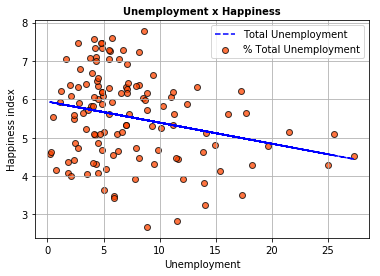

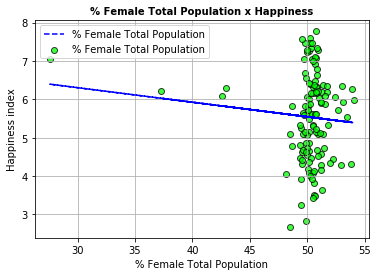

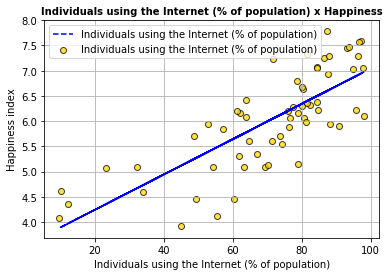

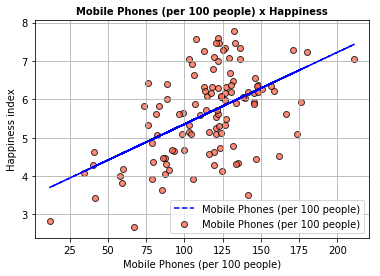

In [7]:
#Saving all data to disk/file
outputfileCSV = open('Outputs/TotalUnemploymentVsHappinessPlot-Rafael.csv', 'w+' )
outputfile1 = mymerge_data.to_csv(index=True)
outputfileCSV.write(outputfile1)
outputfileCSV.close()


import scipy
from scipy import stats

#Plotting 1
y_axis1 = mymerge_data['Life Ladder']       #use this for all plots
x_axis1 = mymerge_data['Total Unemployment']

Unemployment, ax = plt.subplots()
#Unemployment = plt.scatter(x_axis1,y_axis1,marker='o', alpha=0.75, color = mymerge_data['Plot Color % Female population'],edgecolor ="black", label = '% Total Unemployment')
Unemployment = plt.scatter(x_axis1,y_axis1,marker='o', alpha=0.75, color = 'orangered',edgecolor ="black", label = '% Total Unemployment')

# Set line for regression 
(slope, intercept,r_value, p_value, _) = scipy.stats.linregress(x_axis1, y_axis1)
fit = slope * x_axis1 + intercept


# Print R-Sqr and P-Value
print(f"r-squared: {r_value**2}, p-value: {p_value}")
# Plot line
ax.plot(x_axis1, fit, 'b--')


ax.legend(loc="best")
ax.grid(True)
plt.title("Unemployment x Happiness", fontsize=10, fontweight="bold")
plt.ylabel("Happiness index")
plt.xlabel("Unemployment")

#Save plot to file
Unemployment,plt.savefig("Graphs/TotalUnemploymentVsHappinessPlot-RafaelSantos.png")






#Plotting 2
y_axis1 = mymerge_data['Life Ladder']       #use this for all plots
x_axis2 = mymerge_data['% Female Total Population']

FemalePopulation, ax = plt.subplots()
#FemalePopulation = plt.scatter(x_axis2,y_axis1,marker='o', alpha=0.75, color = mymerge_data['Plot Color % Female population'],edgecolor ="black", label = '% Female Total Population')
FemalePopulation = plt.scatter(x_axis2,y_axis1,marker='o', alpha=0.75, color = 'lime',edgecolor ="black", label = '% Female Total Population')

# Set line for regression 
(slope, intercept,r_value, p_value, _) = scipy.stats.linregress(x_axis2, y_axis1)
fit2 = slope * x_axis2 + intercept


# Print R-Sqr and P-Value
print(f"r-squared: {r_value**2}, p-value: {p_value}")
# Plot line
ax.plot(x_axis2, fit2, 'b--')


ax.legend(loc="best")
ax.grid(True)
plt.title("% Female Total Population x Happiness", fontsize=10, fontweight="bold")
plt.ylabel("Happiness index")
plt.xlabel("% Female Total Population")

#Save plot to file
FemalePopulation,plt.savefig("Graphs/PercentageFemaleTotalPopulationVsHappinessPlot-RafaelSantos.png")




#Plotting 3

mymerge_dataInternet = mymerge_data.loc[mymerge_data['Individuals using the Internet (% of population)'] > 0,
                                ['country','A2 (ISO)','Life Ladder','Total Unemployment','Individuals using the Internet (% of population)',
                                 '% Female Total Population','Mobile Phones (per 100 people)',
                                 'Plot Color % Female population','Female majority label']]



y_axis1 = mymerge_dataInternet['Life Ladder']       #use this for all plots
x_axis3 = mymerge_dataInternet['Individuals using the Internet (% of population)']

Internet, ax = plt.subplots()
#Internet = plt.scatter(x_axis3,y_axis1,marker='o', alpha=0.75, color = mymerge_data['Plot Color % Female population'],edgecolor ="black", label = 'Individuals using the Internet (% of population)')
Internet = plt.scatter(x_axis3,y_axis1,marker='o', alpha=0.75, color = "gold",edgecolor ="black", label = 'Individuals using the Internet (% of population)')

# Set line for regression 
(slope, intercept,r_value, p_value, _) = scipy.stats.linregress(x_axis3, y_axis1)
fit3 = slope * x_axis3 + intercept


# Print R-Sqr and P-Value
print(f"r-squared: {r_value**2}, p-value: {p_value}")
# Plot line
ax.plot(x_axis3, fit3, 'b--')


ax.legend(loc="best")
ax.grid(True)
plt.title("Individuals using the Internet (% of population) x Happiness", fontsize=10, fontweight="bold")
plt.ylabel("Happiness index")
plt.xlabel("Individuals using the Internet (% of population)")

#Save plot to file
Internet,plt.savefig("Graphs/IndividualsUsingInternetVsHappinessPlot-RafaelSantos.png")




#Plotting 4
mymerge_dataMobile = mymerge_data.loc[mymerge_data['Mobile Phones (per 100 people)'] > 0,
                                ['country','A2 (ISO)','Life Ladder','Total Unemployment','Individuals using the Internet (% of population)',
                                 '% Female Total Population','Mobile Phones (per 100 people)',
                                 'Plot Color % Female population','Female majority label']]


y_axis1 = mymerge_dataMobile['Life Ladder']       #use this for all plots
x_axis4 = mymerge_dataMobile['Mobile Phones (per 100 people)']

MobilePhones100ppl, ax = plt.subplots()
#MobilePhones100ppl = plt.scatter(x_axis4,y_axis1,marker='o', alpha=0.75, color = mymerge_dataMobile['Plot Color % Female population'],edgecolor ="black", label = 'Mobile Phones (per 100 people)')
MobilePhones100ppl = plt.scatter(x_axis4,y_axis1,marker='o', alpha=0.75, color = 'tomato',edgecolor ="black", label = 'Mobile Phones (per 100 people)')

# Set line for regression 
(slope, intercept,r_value, p_value, _) = scipy.stats.linregress(x_axis4, y_axis1)
fit4 = slope * x_axis4 + intercept


# Print R-Sqr and P-Value
print(f"r-squared: {r_value**2}, p-value: {p_value}")
# Plot line
ax.plot(x_axis4, fit4, 'b--')


ax.legend(loc="best")
ax.grid(True)
plt.title("Mobile Phones (per 100 people) x Happiness", fontsize=10, fontweight="bold")
plt.ylabel("Happiness index")
plt.xlabel("Mobile Phones (per 100 people)")

#Save plot to file
MobilePhones100ppl,plt.savefig("Graphs/MobilePhones100pplVsHappinessPlot-RafaelSantos.png")

Arghavan

## Comparing Countries Happiness vs the Number of Olympic Athletes they had that year
    Is there a correlation between a country's happiness and the number of athletes they send to the Olympics?

In [8]:
#call the csv file made before

olympics_df = pd.read_csv("Outputs/Athlete_Happiness.csv")

#delete column
olympics_df = olympics_df.drop("Unnamed: 0", 1)

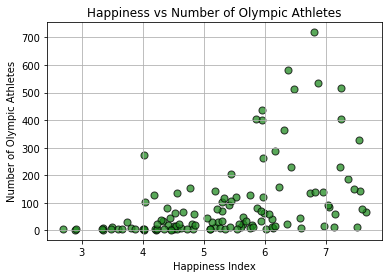

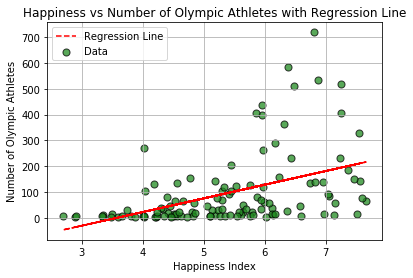

r-squared: 0.2029339326935014 ,P-Value: 2.737377236497723e-07


In [9]:
#create scatterplot Happiness vs Number of Olympic Athletes

plt.scatter(olympics_df["Life Ladder"], olympics_df["Number of Athletes"], 
            marker="o", color="forestgreen", s= 50, edgecolors="black", alpha=0.75)
plt.xlabel("Happiness Index")
plt.ylabel("Number of Olympic Athletes")
plt.title("Happiness vs Number of Olympic Athletes")
plt.grid()

#regression line
slope, intercept, r, p, error = linregress(olympics_df['Life Ladder'], olympics_df["Number of Athletes"])

fit = slope * olympics_df['Life Ladder'] + intercept
fig, ax = plt.subplots()

plt.scatter(olympics_df["Life Ladder"], olympics_df["Number of Athletes"], marker="o", color="forestgreen", 
            s= 50, edgecolors="black", alpha=0.75,label= "Data")
plt.xlabel("Happiness Index")
plt.ylabel("Number of Olympic Athletes")
plt.title("Happiness vs Number of Olympic Athletes with Regression Line")
plt.grid()
ax.plot(olympics_df['Life Ladder'] , fit, 'r--', label="Regression Line")
plt.legend()

#Saving and showing graph
plt.savefig("Graphs/Happiness vs Number of Olympic Athletes.png")
plt.show()
print ("r-squared:", (r**2),",P-Value:", (p))

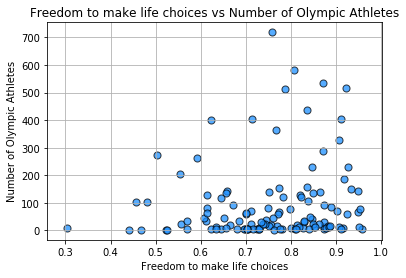

In [10]:
#create scatterplot Freedom to make life choices vs Number of Olympic Athletes

plt.scatter(olympics_df["Freedom to make life choices"], olympics_df["Number of Athletes"], 
            marker="o", color="dodgerblue", s= 50, edgecolors="black", alpha=0.75)
plt.xlabel("Freedom to make life choices")
plt.ylabel("Number of Olympic Athletes")
plt.title("Freedom to make life choices vs Number of Olympic Athletes")
plt.grid()
plt.savefig("Graphs/Freedom to make life choices Olympics")
plt.show()

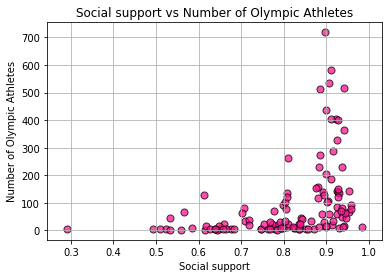

In [11]:
plt.scatter(olympics_df["Social support"], olympics_df["Number of Athletes"], 
            marker="o", color="deeppink", s= 50, edgecolors="black", alpha=0.75)
plt.xlabel("Social support")
plt.ylabel("Number of Olympic Athletes")
plt.title("Social support vs Number of Olympic Athletes")
plt.grid()
plt.savefig("Graphs/Social support Olympics")
plt.show()

Shayan

# Comparing countries Happiness Index vs with the number of tourists.

Is there any correlation between the number of tourists each country has and their happiness level? are the countries that have more tourists happier?

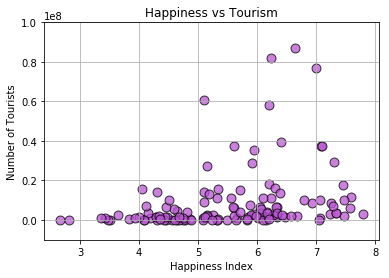

In [12]:
#call the csv file made before

tourism_df = pd.read_csv("Outputs/Tourism_Happiness.csv")
tourism_df = tourism_df.drop("Unnamed: 0", 1)

#make the scatter plot

plt.scatter(tourism_df["Happines Score"], tourism_df["2017"], marker="o", color="mediumorchid", s= 80, edgecolors="black", alpha=0.75)
plt.ylim(-10000000, 100000000)
plt.xlabel("Happiness Index")
plt.ylabel("Number of Tourists")
plt.title("Happiness vs Tourism")
plt.grid()
plt.savefig("Graphs/Tourism.png")
plt.show()

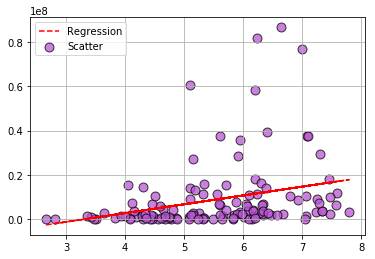

In [13]:
(slope, intercept, r, p, error) = linregress(tourism_df['Happines Score'], tourism_df["2017"])

fit = slope * tourism_df['Happines Score'] + intercept
fig, ax = plt.subplots()
plt.scatter(tourism_df["Happines Score"], tourism_df["2017"], marker="o", color="mediumorchid", s= 80, edgecolors="black", alpha=0.75) #plot each instance
ax.plot( tourism_df['Happines Score'] , fit, 'r--') #plot the regresion calc, with a red dotted line

plt.legend(labels = ["Regression", "Scatter"])
plt.grid()

plt.savefig("Graphs/Tourism_regression.png")
plt.show()

In [14]:
print(f"r-squared: {r*r}, p-value: {p}")


r-squared: 0.08237576653917592, p-value: 0.0011203106447264673


Mariana

# Comparing Countries Happiness Index with Coutries Average Temperature

Does the average temperature of a country affect the country's happiness level? 


In [15]:
#upload csv datasets 
happiness = 'Resources/WorldHappinessReport.csv'
happinessReport=pd.read_csv(happiness)
weather = 'Outputs/WeatherbyCity.csv'
weatherReport=pd.read_csv(weather)


In [16]:
#Happiness
happinessnew= happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()
happinessnew_2017 =happinessnew[happinessnew['year']==2017]
happinessnew_2017=happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()

,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [17]:
#merge weather and happiness together
happy_weather_df = pd.merge(weatherReport, happinessnew_2017, on="Country", how='inner', suffixes=("",""))
happy_weather_df['Temperature'] = pd.to_numeric(happy_weather_df['Temperature'],errors='coerce')
HW_df =happy_weather_df.dropna(subset=['Temperature'])
HW_df.drop(columns=['Unnamed: 0']).head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,53.60,2017,2.661718
2,2,Algeria,Algiers,DZ,69.82,2017,5.248912
3,6,Argentina,Buenos Aires,AR,64.47,2017,6.039330
4,7,Armenia,Yerevan,AM,47.64,2017,4.287736
5,8,Australia,Canberra,AU,64.36,2017,7.257038


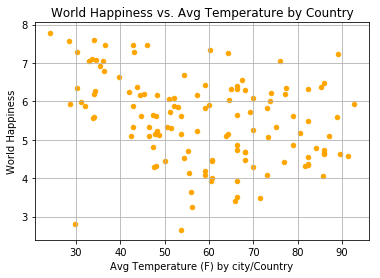

In [18]:
#Plot the correlation between weather and happiness
plt.scatter(HW_df["Temperature"], HW_df["Life Ladder"], c="orange", marker="o", s=20)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Avg Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

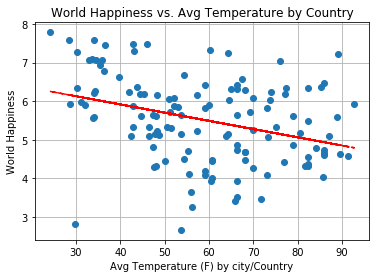

In [19]:
#regression line 
slope, intercept, r, p, error = linregress(HW_df["Temperature"], HW_df["Life Ladder"])
fit = slope * HW_df["Temperature"] + intercept

fig, ax = plt.subplots()
ax.plot(HW_df["Temperature"], HW_df["Life Ladder"],linewidth="0", marker='o') 
ax.plot(HW_df["Temperature"], fit, 'r--') #plot the regresion

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Avg Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

Sandra

# Comparing countries Happiness Index with the musical choices of their residents.
Does the happines of the country determine the happiness level of the music they choose to listen? 
Does it correlate to the energy, speechinness or instrumentalness of their songs?

In [20]:
# load datasets
RawSpotifyData = pd.read_csv('Outputs/SpotifyWithFeaturesFinal.csv')
CountryCodeRaw = pd.read_csv('Resources/CountryCodesLookup.csv', encoding="ISO-8859-1")
CountryCodeRaw["region"]=CountryCodeRaw["A2 (ISO)"].str.lower()
CountryCodeRaw["country"]=CountryCodeRaw["COUNTRY"]
#Find CountryName from spotifyData Using the countryLookup file
SpotifyDF=pd.merge(RawSpotifyData,CountryCodeRaw, on="region", how='inner',suffixes=("","") )
#summarize
GroupByDF=RawSpotifyData.groupby(['region'])
MusicProfileRaw=GroupByDF.mean()
#Find CountryName from spotifyData Using the countryLookup file
MusicProfileDF=pd.merge(MusicProfileRaw,CountryCodeRaw, on="region", how='inner',suffixes=("","") )
MusicProfileDF.head(1)

#                                       final data set
#merge with Happiness report
MusicHappinessDF=pd.merge(MusicProfileDF,WHR_DF,on='country', how='inner',suffixes=("","")  )
MusicHappinessDF.columns



Index(['region', 'Position', 'Streams', 'happiness', 'energy', 'danceability',
       'loudness', 'speechiness', 'instrumentalness', 'COUNTRY', 'A2 (ISO)',
       'A3 (UN)', 'NUM (UN)', 'DIALING CODE', 'spotifyFlag', 'country', 'year',
       'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

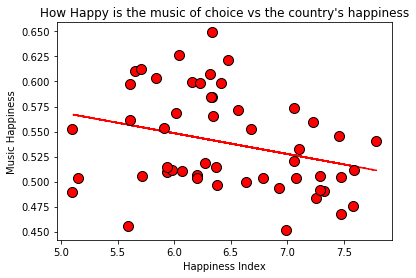

R sqr= -0.2942812179645868 P-Value= 0.03420502170570032


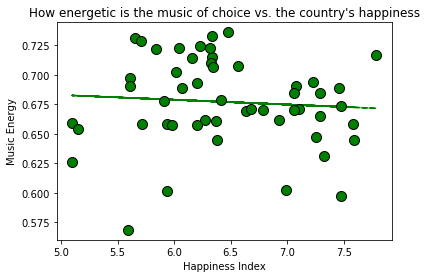

 R = -0.0756075239145562 P-Value= 0.5942249735949077


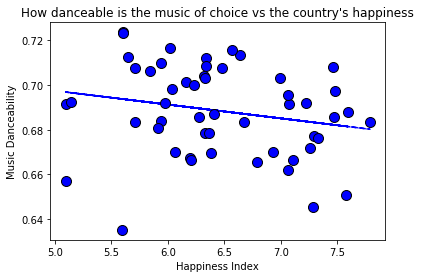

 R = -0.2125525977154707 P-Value= 0.13032414019199676


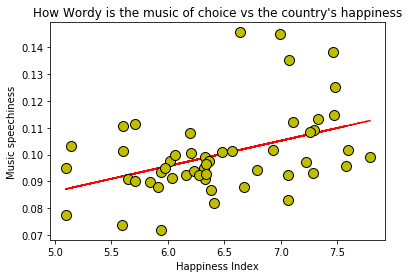

  R = 0.42188574424052505 P-Value= 0.0018385902202258566


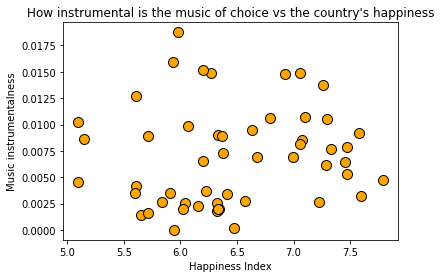

Music instrumentalness vs country happiness is not a statistically significant model.  R sqr= 0.10992353200319324 P-Value= 0.43789307286248536


In [21]:
                        #Music happiness is a measure of how positive the songs are

#scatterPlot
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["happiness"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')

#regression


(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["happiness"])
fit = slope * MusicHappinessDF['Life Ladder'] + intercept
ax.plot(MusicHappinessDF['Life Ladder'], fit, 'r--') 

plt.xlabel('Happiness Index')
plt.ylabel('Music Happiness')
plt.title("How Happy is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicPositivity.png")
plt.show()


print("R sqr= " + str(r) + ' P-Value= ' + str(p))


                                            #Music Energy
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"],  fmt="o",color= 'g'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')

#regression


(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"])
fit = slope * MusicHappinessDF['Life Ladder'] + intercept
ax.plot(MusicHappinessDF['Life Ladder'], fit, 'g--') 

plt.xlabel('Happiness Index')
plt.ylabel('Music Energy')
plt.title("How energetic is the music of choice vs. the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicEnergy.png")
plt.show()

#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"])
print(" R = " + str(r) + ' P-Value= ' + str(p))


                                        #Music Danceability
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"],  fmt="o",color= 'b'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')

#regression


(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"])
fit = slope * MusicHappinessDF['Life Ladder'] + intercept
ax.plot(MusicHappinessDF['Life Ladder'], fit, 'b--') 

plt.xlabel('Happiness Index')
plt.ylabel('Music Danceability')
plt.title("How danceable is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicDanceability.png")
plt.show()


#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"])
print(" R = " + str(r) + ' P-Value= ' + str(p))


                                        #Music Speachiness
#scatterPlot
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"],  fmt="o",color= 'y'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
#regression


(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"])
fit = slope * MusicHappinessDF['Life Ladder'] + intercept
ax.plot(MusicHappinessDF['Life Ladder'], fit, 'r--') 

plt.xlabel('Happiness Index')
plt.ylabel('Music speechiness')
plt.title("How Wordy is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicSpeacheeness.png")
plt.show()


#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"])
print("  R = " + str(r) + ' P-Value= ' + str(p))


                                        # Music instrumentalness
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["instrumentalness"],  fmt="o",color= 'orange'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music instrumentalness')
plt.title("How instrumental is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicInstrumentalness.png")
plt.show()

#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["instrumentalness"])
print("Music instrumentalness vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))



Side findings:
Do countries have specific music profiles?
What would be the music profile of the US? andd is there a song that fits that exact music profile?

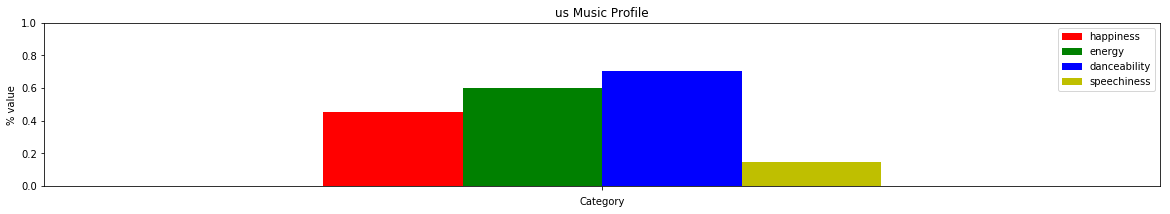

,happiness,energy,danceability,speechiness
Category,,,,
,0.451718,0.602584,0.703109,0.145163


In [22]:
country='us'

CountryMusicProfileDF=MusicHappinessDF.loc[MusicHappinessDF["region"]==country,:]
CountryMusicProfileDF = CountryMusicProfileDF[["happiness", "energy", "danceability" ,"speechiness" ]]
CountryMusicProfileDF["Category"]=""
CountryMusicProfileDF=CountryMusicProfileDF.set_index("Category")

graph=CountryMusicProfileDF.plot(kind="bar", figsize=(20,3), color=['r','g','b','y'] )
plt.ylabel('% value')
plt.title(country +' Music Profile')
plt.ylim(0,1)

#save the image in the folder
plt.savefig("Graphs/USMusicProfile.png")
plt.show()


CountryMusicProfileDF.head()

In [23]:
# Can I find a song with this profile?

happinessHigh=int((CountryMusicProfileDF["happiness"]+.03)*100)/100
happinessLow=int((CountryMusicProfileDF["happiness"]-.03)*100)/100


energyHigh=int((CountryMusicProfileDF["energy"]+.03)*100)/100
energyLow=int((CountryMusicProfileDF["energy"]-.03)*100)/100



danceabilityHigh=int((CountryMusicProfileDF["danceability"]+.03)*100)/100
danceabilityLow=int((CountryMusicProfileDF["danceability"]-.03)*100)/100



speechinessHigh=int((CountryMusicProfileDF["speechiness"]+.03)*100)/100
speechinessLow=int((CountryMusicProfileDF["speechiness"]-.03)*100)/100



FindSong=RawSpotifyData.loc[(RawSpotifyData["happiness"]>happinessLow) 
                            &(RawSpotifyData["happiness"]<happinessHigh) 
                            &(RawSpotifyData["energy"]>energyLow) 
                            &(RawSpotifyData["energy"]<energyHigh) 
                            &(RawSpotifyData["danceability"]>danceabilityLow) 
                            &(RawSpotifyData["danceability"]<danceabilityHigh) 
                            &(RawSpotifyData["speechiness"]>speechinessLow) 
                            &(RawSpotifyData["speechiness"]<speechinessHigh) 
                            
                            
                            
                            
                            
                            
                            ,:] 
FindSong["Track Name"].head(1)

1255    Ahora Dice (feat. J Balvin & Arcangel)
Name: Track Name, dtype: object

https://www.youtube.com/watch?v=c73Cu3TQnlg